### Plot heritability estimates for cells measured
Gene expression variance was measured on gated cell populations by the coefficient of variation (ration of standard deviation to the mean).

Heritability is twice the difference between the intra-class correlations of mono- and dizygotic twin pairs.

$H^2 = 2(r_{DZ} - r_{MZ})$

Plot the calculated heritabilities across cell types and genes.

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cd4_p1 = pd.read_table("/ifs/projects/proj052/pipeline_heritability/representative.dir/CD4_Tcell_CV-P1.H2",
                       sep="\t", header=0, index_col=0)
cd4_p1.columns = ["Panel1_CD4+_Tcells"]

cd4_naive = pd.read_table("/ifs/projects/proj052/pipeline_heritability/representative.dir/CD4_Tnaive_CV-P3.H2",
                         sep="\t", header=0, index_col=0)
cd4_naive.columns = ["Panel3_CD4+_Tcells"]

cd8_naive = pd.read_table("/ifs/projects/proj052/pipeline_heritability/representative.dir/CD8_Tnaive_CV-P3.H2",
                         sep="\t", header=0, index_col=0)
cd8_naive.columns = ["Panel3_CD8+_Tcells"]

cd8_tmem = pd.read_table("/ifs/projects/proj052/pipeline_heritability/representative.dir/CD8_Tmem_CV-P3.H2",
                        sep="\t", header=0, index_col=0)
cd8_tmem.columns = ["Panel3_CD8+_Tmem"]

cd8_p1 = pd.read_table("/ifs/projects/proj052/pipeline_heritability/representative.dir/CD8_Tcell_CV-P1.H2",
                      sep="\t", header=0, index_col=0)
cd8_p1.columns = ["Panel1_CD8+_Tcells"]

dn_p1 = pd.read_table("/ifs/projects/proj052/pipeline_heritability/representative.dir/DN_Tcell_CV-P1.H2",
                     sep="\t", header=0, index_col=0)
dn_p1.columns = ["Panel1_DN_Tcells"]

dp_p1 = pd.read_table("/ifs/projects/proj052/pipeline_heritability/representative.dir/DP_Tcell_CV-P1.H2",
                     sep="\t", header=0, index_col=0)
dp_p1.columns = ["Panel1_DP_Tcells"]

In [3]:
cd4_merge = pd.merge(cd4_p1, cd4_naive, left_index=True, right_index=True, how='outer')
cd8_merge = pd.merge(cd8_p1, pd.merge(cd8_naive, cd8_tmem, left_index=True, right_index=True, how='outer'),
                    left_index=True, right_index=True, how='outer')
imm_merge = pd.merge(dp_p1, dn_p1, left_index=True, right_index=True, how='outer')

In [4]:
tcell_merge = pd.merge(imm_merge, pd.merge(cd4_merge, cd8_merge, left_index=True, right_index=True, how='outer'),
                       left_index=True, right_index=True, how='outer')
tcell_merge["Marker"] = tcell_merge.index

In [5]:
tcell_melt = pd.melt(tcell_merge, id_vars="Marker")
tcell_melt.columns = ["Marker", "Cell Type", "H2"]

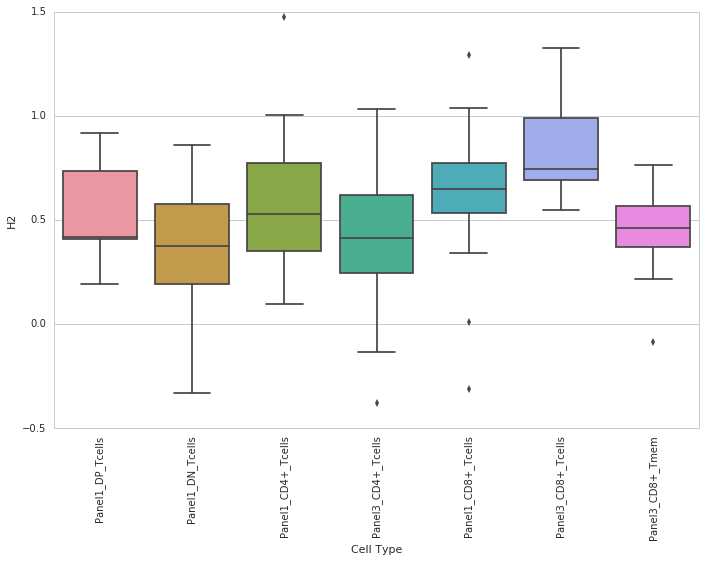

In [6]:
sns.set_style("whitegrid")
sns.set_context("notebook")
plt.figure(figsize=(10, 8))
bx = sns.boxplot(x="Cell Type", y="H2", data=tcell_melt)
plt.setp(bx.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.savefig("/ifs/projects/proj052/notebooks/H2_boxplot-Cells.png", dpi=90)

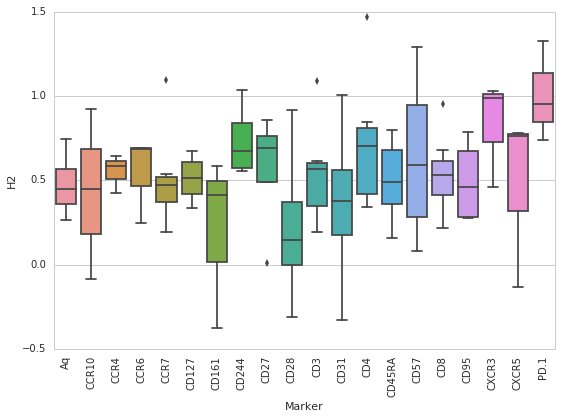

In [7]:
plt.figure(figsize=(8, 6))
bx = sns.boxplot(x="Marker", y="H2", data=tcell_melt)
plt.setp(bx.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.savefig("/ifs/projects/proj052/notebooks/H2_boxplot-Markers.png", dpi=90)

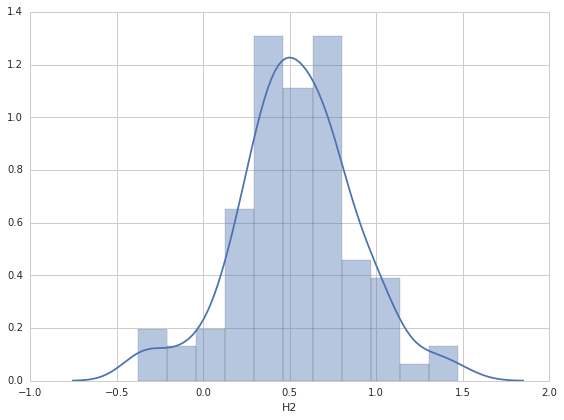

In [8]:
plt.figure(figsize=(8, 6))
sns.distplot(tcell_melt["H2"].dropna(axis=0))
plt.tight_layout()
plt.savefig("/ifs/projects/proj052/notebooks/H2_dist-all.png", dpi=90)